## Importing Libraries

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


##### Dataset

In [174]:
df=pd.read_csv('housing_price.csv')
df.head

<bound method NDFrame.head of        SquareFeet  Bedrooms  Bathrooms Neighborhood  YearBuilt          Price
0            2126         4          1        Rural       1969  215355.283618
1            2459         3          2        Rural       1980  195014.221626
2            1860         2          1       Suburb       1970  306891.012076
3            2294         2          1        Urban       1996  206786.787153
4            2130         5          2       Suburb       2001  272436.239065
...           ...       ...        ...          ...        ...            ...
49995        1282         5          3        Rural       1975  100080.865895
49996        2854         2          2       Suburb       1988  374507.656727
49997        2979         5          3       Suburb       1962  384110.555590
49998        2596         5          2        Rural       1984  380512.685957
49999        1572         5          3        Rural       2011  221618.583218

[50000 rows x 6 columns]>

In [190]:
print(df.isnull().sum())  
print(df.columns)  

SquareFeet      0
Bedrooms        0
Bathrooms       0
Neighborhood    0
YearBuilt       0
Price           0
dtype: int64
Index(['SquareFeet', 'Bedrooms', 'Bathrooms', 'Neighborhood', 'YearBuilt',
       'Price'],
      dtype='object')


#### Extracting the Usefull information from Dataset

In [176]:
y=df['Price']
x=df[['Bathrooms','Bedrooms','SquareFeet']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

### Plotting Dataset

##### Using Matplotlib

C:\Users\Home\AppData\Local\Temp\ipykernel_3644\1794780238.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


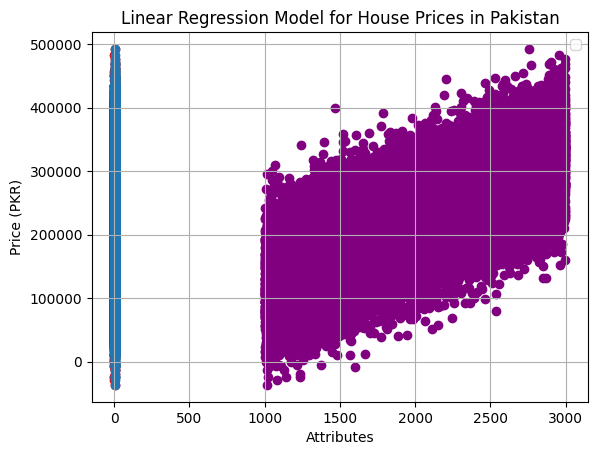

In [193]:
plt.scatter(x_train['Bathrooms'],y_train,color='red')
plt.scatter(x_train['Bedrooms'],y_train)
plt.scatter(x_train['SquareFeet'],y_train,color='purple')
plt.xlabel('Attributes')
plt.ylabel('Price (PKR)')
plt.title('Linear Regression Model for House Prices in Pakistan')
plt.legend()
plt.grid()
plt.show()

##### Training the Model

In [181]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [182]:
y_predict=model.predict(x_test)
pd.DataFrame({"Acutal ":y_test,"Predicted ":y_predict})

,Acutal,Predicted
33553,170835.035713,218544.297958
9427,126913.469998,135742.642455
199,246611.883092,256004.028801
12447,244250.462969,258784.730184
39489,271127.650112,278071.690311
...,...,...
28567,199265.817701,225040.877253
25079,241869.621812,199486.471471
18707,352184.123976,309513.871350
15200,244830.805238,199648.304525


#### Plotting the Results

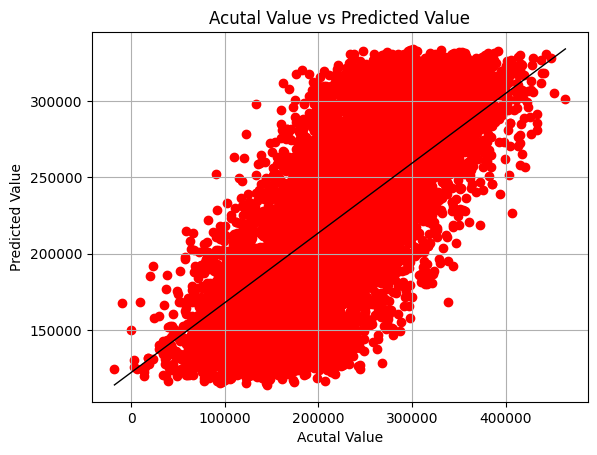

In [199]:
plt.scatter(y_test,y_predict,color='red')
plt.plot([y_test.min(),y_test.max()],[y_predict.min(),y_predict.max()],color='black',linewidth='1')
plt.xlabel('Acutal Value')
plt.ylabel('Predicted Value')
plt.title('Acutal Value vs Predicted Value')
plt.grid()
plt.show()

### Evaluating the Model

In [200]:
print("R2 Score : ",r2_score(y_test,y_predict))
print("MAE : ",mean_absolute_error(y_test,y_predict))
print("MSE : ",mean_squared_error(y_test,y_predict))

R2 Score :  0.57528585648486
MAE :  39437.7899284065
MSE :  2437839375.9609
